In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

## Creating DataFrame for analysis period
(from corona crash, from 23rd March 2020 to 29th May 2020)

In [2]:
pd.to_datetime(["2020-03-23"]).astype(int) / 10**9

Float64Index([1584921600.0], dtype='float64')

In [3]:
pd.to_datetime(["2020-05-29"]).astype(int) / 10**9

Float64Index([1590710400.0], dtype='float64')

In [4]:
r = requests.get("https://finnhub.io/api/v1/stock/candle?symbol=AAL&resolution=15&from=1584921600&to=1590710400&token=")

In [5]:
print(r.json())

{'c': [10, 9.9, 9.8, 9.7, 9.82, 9.8, 9.87, 9.92, 9.81, 9.81, 10.15, 10.31, 10.23, 10.2, 10.2, 10.2, 10, 9.87, 9.8, 11, 9.8, 10.9, 10.45, 9.99, 9.81, 9.82, 10.15, 10.61, 10.23, 10.27, 10.15, 10.225, 10.95, 10.98, 11, 11.12, 10.89, 10.98, 10.46, 10.74, 11.1, 10.95, 10.74, 10.53, 10.55, 10.28, 10.2, 10.19, 10.11, 10.23, 10.495, 10.58, 10.515, 10.345, 10.28, 10.44, 10.21, 10.265, 10.24, 10.25, 10.21, 10.14, 10.15, 10.22, 10.18, 10.28, 10.3, 10.32, 10.43, 10.4601, 10.45, 10.49, 10.56, 10.83, 10.83, 10.84, 10.85, 10.88, 10.87, 10.97, 10.99, 11.05, 10.9, 10.95, 11.1, 11.1, 11.2, 11.24, 11.24, 11.19, 11.28, 11.27, 11.15, 11.05, 11.15, 11.15, 11.24, 10.99, 11.4899, 11.94, 11.8002, 11.92, 11.655, 11.81, 12.21, 11.2, 12.8568, 12.4667, 11.1, 13.44, 11.15, 13.9, 14.06, 14.6099, 11.47, 11.97, 11.93, 11.85, 11.72, 11.79, 12.18, 12.84, 12.86, 12.48, 12.49, 13.35, 13.68, 13.66, 14.02, 14.68, 14.27, 13.89, 13.38, 13.55, 13.54, 13.28, 13.12, 13.46, 13.36, 13.67, 13.51, 13.71, 14.2, 13.89, 14.08, 13.9, 14

In [6]:
df = pd.DataFrame(r.json())
df.head()

,c,h,l,o,s,t,v
0,10.00,10.15,9.93,10.10,ok,1584936000,5129
1,9.90,9.95,9.90,9.95,ok,1584936900,1668
2,9.80,9.90,9.76,9.89,ok,1584937800,22315
3,9.70,9.70,9.50,9.66,ok,1584938700,3683
4,9.82,9.82,9.66,9.66,ok,1584939600,1397


In [7]:
#check status of all periods
df["s"].value_counts()
#ok means all were retrieved, no nulls

ok    3218
Name: s, dtype: int64

In [8]:
#can be dropped since it has been checked
df.drop("s", axis=1, inplace=True)

In [9]:
#convert from unix to datetime
df["t"] = pd.to_datetime(df["t"], unit="s")

In [10]:
df.head()

,c,h,l,o,t,v
0,10.00,10.15,9.93,10.10,2020-03-23 04:00:00,5129
1,9.90,9.95,9.90,9.95,2020-03-23 04:15:00,1668
2,9.80,9.90,9.76,9.89,2020-03-23 04:30:00,22315
3,9.70,9.70,9.50,9.66,2020-03-23 04:45:00,3683
4,9.82,9.82,9.66,9.66,2020-03-23 05:00:00,1397


In [11]:
#rename columns for clarity
df.columns

Index(['c', 'h', 'l', 'o', 't', 'v'], dtype='object')

In [12]:
df.columns = ['close', 'high', 'low', 'open', 'time', 'volume']

In [13]:
df.head()

,close,high,low,open,time,volume
0,10.00,10.15,9.93,10.10,2020-03-23 04:00:00,5129
1,9.90,9.95,9.90,9.95,2020-03-23 04:15:00,1668
2,9.80,9.90,9.76,9.89,2020-03-23 04:30:00,22315
3,9.70,9.70,9.50,9.66,2020-03-23 04:45:00,3683
4,9.82,9.82,9.66,9.66,2020-03-23 05:00:00,1397


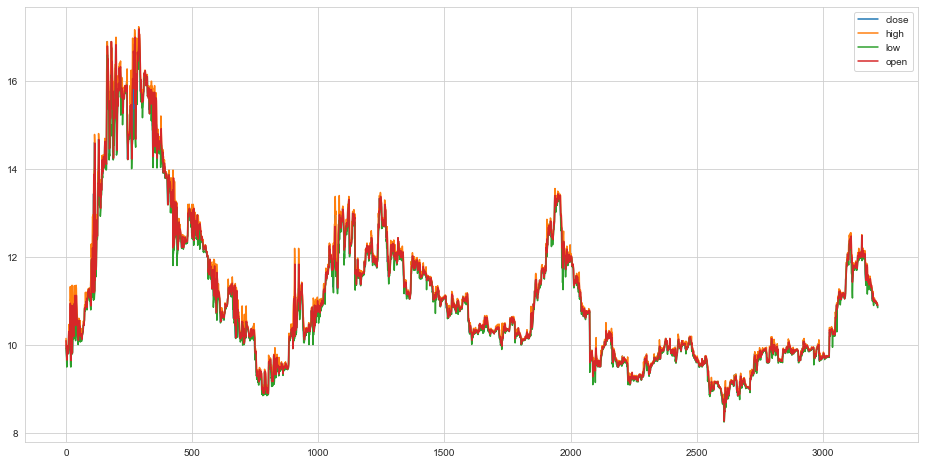

In [14]:
df[["close", "high", "low", "open"]].plot(figsize=(16,8))

### Without weekends/dates

(0.0, 3377.85)

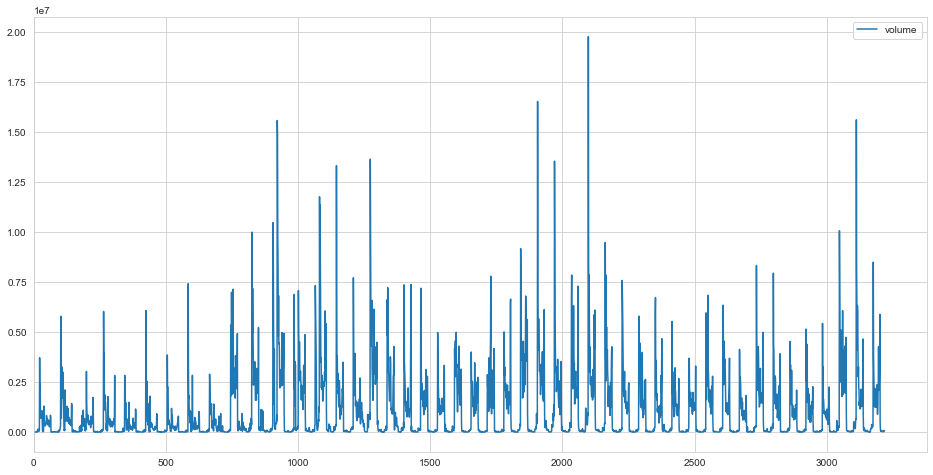

In [15]:
df["volume"].plot(legend=True, figsize=(16,8))
plt.xlim(0)

### With weekends/dates

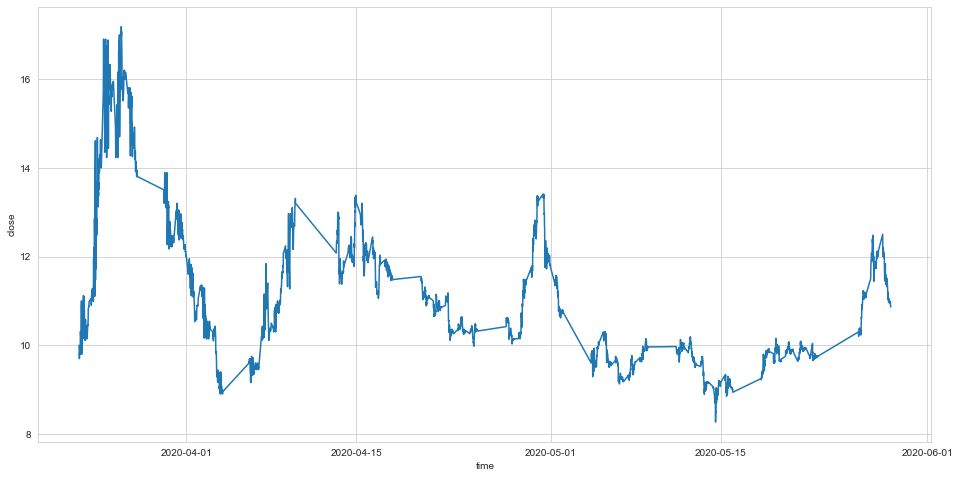

In [16]:
#long dashes are the weekends
#also includes correct dates
plt.figure(figsize=(16,8))
sns.lineplot(x="time", y="close", data=df)

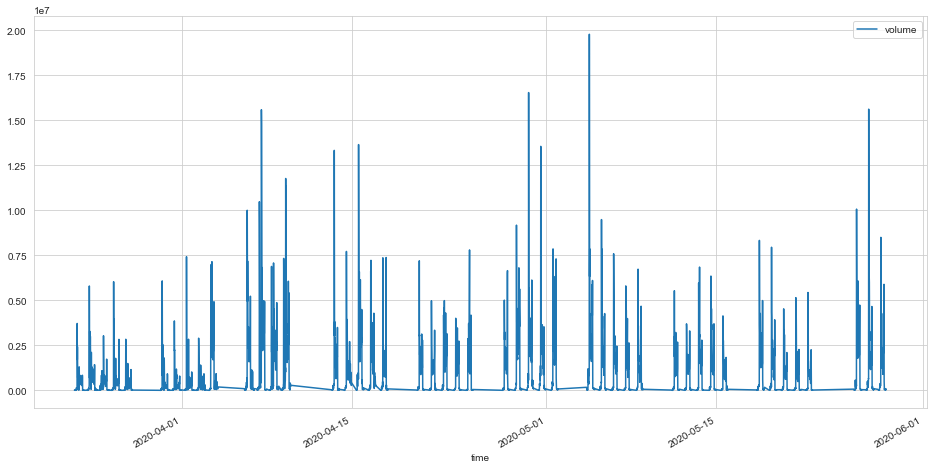

In [17]:
df.plot(x="time", y="volume", legend=True, figsize=(16,8))
#can visually see 10 weeks, separated by 9 weekeends

# Neural Network

### Set train/test and Scale

In [18]:
df.head()

,close,high,low,open,time,volume
0,10.00,10.15,9.93,10.10,2020-03-23 04:00:00,5129
1,9.90,9.95,9.90,9.95,2020-03-23 04:15:00,1668
2,9.80,9.90,9.76,9.89,2020-03-23 04:30:00,22315
3,9.70,9.70,9.50,9.66,2020-03-23 04:45:00,3683
4,9.82,9.82,9.66,9.66,2020-03-23 05:00:00,1397


In [19]:
df.set_index("time", inplace=True)

In [20]:
#df.drop(["high", "low", "open"], axis=1, inplace=True)
#these 3 essentially move extremely similar to the close price
#they would not contribute much to the NN

In [21]:
len(df)

3218

In [22]:
df.shape

(3218, 5)

In [23]:
#split test and train percentage
#we're using 10 weeks of data, so about 2 weeks should be split
0.20 * len(df)

643.6

In [24]:
test_size = int(0.20 * len(df))
split_index = len(df) - test_size

In [25]:
train = df[:split_index]
test = df[split_index:]

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Generators

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
#must be less than test size
length = int(len(df) * 0.12)
length

386

In [31]:
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

In [32]:
val_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                   length=length, batch_size=1)

### Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [34]:
#number of features, based on df
#2 features; close and volume
n_features = 5

In [35]:
model = Sequential()

model.add(LSTM(32, activation="relu",
              input_shape=(length, n_features)))

#same as number of features
model.add(Dense(5))
model.compile(optimizer="adam", loss="mse")

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4864      
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 5,029
Trainable params: 5,029
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor="val_loss", patience=3)

In [39]:
#model.fit(generator, validation_data=val_generator,
#         epochs=30, callbacks=[early_stop])

In [40]:
df

,close,high,low,open,volume
time,,,,,
2020-03-23 04:00:00,10.00,10.15,9.93,10.10,5129
2020-03-23 04:15:00,9.90,9.95,9.90,9.95,1668
2020-03-23 04:30:00,9.80,9.90,9.76,9.89,22315
2020-03-23 04:45:00,9.70,9.70,9.50,9.66,3683
2020-03-23 05:00:00,9.82,9.82,9.66,9.66,1397
...,...,...,...,...,...
2020-05-28 22:45:00,10.94,10.96,10.93,10.94,31618
2020-05-28 23:00:00,10.96,10.96,10.91,10.93,67508
2020-05-28 23:15:00,10.94,10.96,10.92,10.95,17990


### Completed Model and Metrics

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model = load_model("cov_stock_model.h5")

In [43]:
#metrics = pd.DataFrame(model.history.history)
#metrics.plot()
#SEE DOCUMENT for loss graph, taken from Google Colab

In [44]:
test_predictions = []

first_batch = scaled_train[-length:]
current_batch = first_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],
                             [[current_pred]], axis=1)

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)

In [46]:
test["pClose"] = true_predictions[:,0]
test["pHigh"] = true_predictions[:,1]
test["pLow"] = true_predictions[:,2]
test["pOpen"] = true_predictions[:,3]
test["pVolume"] = true_predictions[:,4]

<ipython-input-46-8de912eb637b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pClose"] = true_predictions[:,0]
<ipython-input-46-8de912eb637b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pHigh"] = true_predictions[:,1]
<ipython-input-46-8de912eb637b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g